In [112]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact


%matplotlib inline

In [113]:
data = pd.read_csv("^GSPC.csv", parse_dates=True, index_col = 0)

In [114]:
data.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
1998-12-22  1202.839966  1209.219971  1192.719971  1203.569946  1203.569946   
1998-12-23  1203.569946  1229.890015  1203.569946  1228.540039  1228.540039   
1998-12-24  1228.540039  1229.719971  1224.849976  1226.270020  1226.270020   
1998-12-28  1226.270020  1231.520020  1221.170044  1225.489990  1225.489990   
1998-12-29  1225.489990  1241.859985  1220.780029  1241.810059  1241.810059   

               Volume  
Date                   
1998-12-22  680500000  
1998-12-23  697500000  
1998-12-24  246980000  
1998-12-28  531560000  
1998-12-29  586490000

In [115]:
prices = pd.DataFrame ( 
    {
        "M_Top": data["Adj Close"],
        "Original": data["Adj Close"],
        "M_Bottom": data["Adj Close"],
    }
)

In [116]:
prices.head()


M_Top     Original     M_Bottom
Date                                             
1998-12-22  1203.569946  1203.569946  1203.569946
1998-12-23  1228.540039  1228.540039  1228.540039
1998-12-24  1226.270020  1226.270020  1226.270020
1998-12-28  1225.489990  1225.489990  1225.489990
1998-12-29  1241.810059  1241.810059  1241.810059

In [117]:
ret = prices.pct_change()


In [118]:

ret.head()


M_Top  Original  M_Bottom
Date                                    
1998-12-22       NaN       NaN       NaN
1998-12-23  0.020747  0.020747  0.020747
1998-12-24 -0.001848 -0.001848 -0.001848
1998-12-28 -0.000636 -0.000636 -0.000636
1998-12-29  0.013317  0.013317  0.013317

<AxesSubplot:xlabel='Date'>

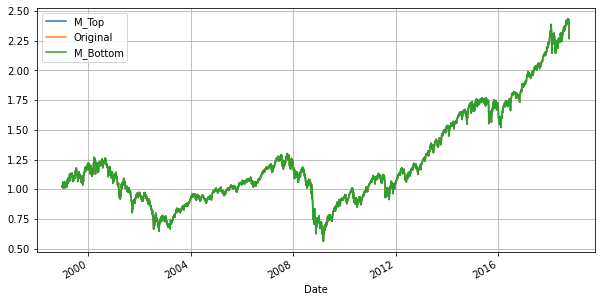

In [122]:
(ret+1).cumprod().plot(figsize = (10,5), grid = True)


In [124]:
val_big = ret["Original"].nlargest(n = 5)
val_big

Date
2008-10-13    0.115800
2008-10-28    0.107890
2009-03-23    0.070758
2008-11-13    0.069213
2008-11-24    0.064723
Name: Original, dtype: float64

In [100]:
val_big = ret["Original"].nlargest(n = 5).iloc[4]
val_small = ret["Original"].nsmallest (n = 5).iloc[4]


In [120]:
def remove_outliers (outlier_n):
    ret_copy = ret.copy()
    val_big = ret_copy["Original"].nlargest(n = outlier_n).iloc[outlier_n-1]
    val_small = ret_copy["Original"].nsmallest (n = outlier_n).iloc[outlier_n-1]
    
    ret_copy["M_Top"] = np.where(ret_copy["M_Top"] > val_big, 0 , ret_copy["M_Top"])
    ret_copy["M_Bottom"] = np.where(ret_copy["M_Bottom"] < val_small, 0 , ret_copy["M_Bottom"])
    (ret_copy+1).cumprod().plot(figsize = (15,10))
    plt.show()

In [121]:
interact (remove_outliers, outlier_n = (0,10,1))

interactive(children=(IntSlider(value=5, description='outlier_n', max=10), Output()), _dom_classes=('widget-in…

<function __main__.remove_outliers(outlier_n)>